# Food Image Deca (10 Classes) Classifier - Computer Vision

This notebook demonstrates the implementation of several deep learning models and computer vision experiments to classify images of 10 different food classes using TensorFlow. The optimal model achieves an accuracy of **90%** on the full test set, showcasing the effectiveness of transfer learning with fine-tuning and data augmentation.

### Instructions for Running the Notebook
**1. Clone the Repository:** Ensure you have cloned the repository to your local machine or directly open it in Google Colab.

**2. Dataset Preparation:** The datasets used in this notebook have been preprocessed in the 'Organizing_The_Food101_Dataset' notebook of this project, and stored in my Google Drive. They can be accessed and downloaded directly from the provided links within the notebook.

**3. Dependencies:** Install the required libraries by running the provided cells in the notebook.

**4. Execution:** Follow the cells sequentially to load the data, preprocess it, build the model, and evaluate its performance. Detailed explanations and code comments are provided for each step.

**5. Helper Functions:** The project includes a file named 'helper_functions.py' stored in the 'scripts' folder in the Github repository. This file contains utility functions needed for data processing and model evaluation, and is imported in this notebook.

### TensorFlow Version Checking

In [1]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


## GPU Checking

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Get the Data

For the next three model experiments ('model_1', 'model_2', 'model_3'), we will utilize **10% of the 10 classes dataset**. This dataset is publicly accessible on my Google Drive account and will be downloaded from there.

Additionally, we will clone my GitHub repository to retrieve the necessary auxiliary functions located in the 'helper_functions.py' file within the 'scripts' folder of the repository.

In [3]:
# Clone the Github repository (if you haven't yet)
!git clone https://github.com/IsraelAzoulay/food-image-deca-classifier-computer-vision.git

Cloning into 'food-image-deca-classifier-computer-vision'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 1.58 MiB | 7.20 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
# Navigate to the project directory
%cd food-image-deca-classifier-computer-vision

# Add the scripts folder to the Python path
import sys
sys.path.append('/content/food-image-deca-classifier-computer-vision/scripts')

# Import the helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

/content/food-image-deca-classifier-computer-vision


Download the dataset from the Google Drive account:

In [5]:
# Install gdown if not already installed
!pip install gdown

In [6]:
# Download the 10_food_classes_10_percent dataset
!gdown --id 1_j4YZSChUA34UN2PvaFB3jmn8WW-A0_G

# Unzip the dataset file by using the 'unzip_data()' function we have imported from the 'helper_functions.py' script
unzip_data("10_food_classes_10_percent.zip")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1_j4YZSChUA34UN2PvaFB3jmn8WW-A0_G
From (redirected): https://drive.google.com/uc?id=1_j4YZSChUA34UN2PvaFB3jmn8WW-A0_G&confirm=t&uuid=c412bb5f-cc7d-425f-b0de-154c32e18ef3
To: /content/food-image-deca-classifier-computer-vision/10_food_classes_10_percent.zip
100% 169M/169M [00:01<00:00, 143MB/s]


## Inspect the data

In [7]:
# Display the contnent of the dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

## Preprocess the data

Let's establish the training and testing dataloaders as 'PrefetchDataset' datatype to enhance the loading speed:

In [8]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [9]:
import tensorflow as tf

# Define the target size of the images to load in
IMG_SIZE = (224, 224)

# Create training data input (dataloader)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

# Create testing data input (dataloader)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
# Let's confirm that the training data datatype is as 'PrefetchDataset'
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
# Display the class names in the dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
# Display an example batch of training data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.79964294e+02 2.39642849e+01 2.29591799e+00]
   [1.78209183e+02 2.28061237e+01 1.23979616e+00]
   [1.79647964e+02 2.65918350e+01 6.51530504e+00]
   ...
   [2.10204102e+02 2.08357147e+02 1.57846893e+02]
   [2.07066345e+02 2.04928558e+02 1.47780579e+02]
   [2.10418381e+02 2.06418381e+02 1.44704025e+02]]

  [[1.74698990e+02 2.24846954e+01 1.65816367e+00]
   [1.82586731e+02 3.03724518e+01 7.44387960e+00]
   [1.80244888e+02 2.95714321e+01 8.37245178e+00]
   ...
   [2.10918472e+02 2.04132751e+02 1.58005203e+02]
   [2.18025406e+02 2.08443787e+02 1.55152939e+02]
   [2.13571671e+02 2.03260483e+02 1.45979767e+02]]

  [[1.68193878e+02 2.83367348e+01 6.55102158e+00]
   [1.71331635e+02 3.30459175e+01 1.00459194e+01]
   [1.69602036e+02 3.33163300e+01 7.31632710e+00]
   ...
   [2.05494904e+02 1.92923431e+02 1.47923431e+02]
   [2.15290848e+02 2.01775543e+02 1.52362244e+02]
   [2.22831741e+02 2.07474594e+02 1.55260300e+02]]

  ...

  [[2.52806854e+01 1.92041626e+01 0.00000000e+00]
   [3

## Create and Evaluate with 'model_1' - Transfer Learning Feature Extraction model, using the Keras Functional API

In [13]:
# Create a 'EfficientNetV2B0' base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
# Freeze freeze all of the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
base_model.trainable = False

# Create an input layer for 'model_1'
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
# Pass the inputs to the 'base_model' (the 'EfficientNetV2B0' inputs don't have to be normalized, since this base model already has built-in normalization)
x = base_model(inputs)
# Print the data shape after passing it to 'base_model'
print(f"Shape after base_model: {x.shape}")
# Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")
# Create the output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs and the outputs into 'model_1'
model_1 = tf.keras.Model(inputs, outputs)

# Compile 'model_1'
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit 'model_1'
history_10_percent = model_1.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Validate on 25% of the validation set (which in our case is the test set) for a faster fitting
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track the model's_1 training logs for visualization later with TensorBoard
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240523-150625
Epoch 1/5
24/24 [==============================] - 99s 4s/step - loss: 1.8676 - accuracy: 0.4067 - val_loss: 1.3264 - val_accuracy: 0.7188
Epoch 2/5
24/24 [==============================] - 77s 3s/step - loss: 1.1459 - accuracy: 0.7387 - val_loss: 0.8786 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 84s 4s/step - loss: 0.8510 - accuracy: 0.8013 - val_loss: 0.7075 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 89s 4s/step - loss: 0.6981 - accuracy: 0.8280 - val_loss: 0.6281 - val_accuracy: 0.8602
Epoch 5/5
24/24 [==============================] - 80s 3s/step - loss: 0.5952 - accuracy: 0.8627 - val_loss: 0.5463 - val_accuracy: 0.8701


In [14]:
# Display all the layers of the 'base_model'
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [15]:
# Display the summary of the 'base_model'
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [16]:
# Display the summary of the whole 'model_1' model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

As shown in the model's_1 summary, 'model_1' contains 5 layers, one of which is the 'efficientnetv2' base model, consisting of 269 layers.



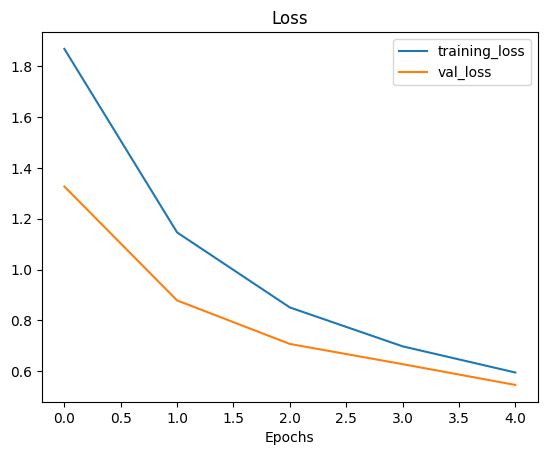

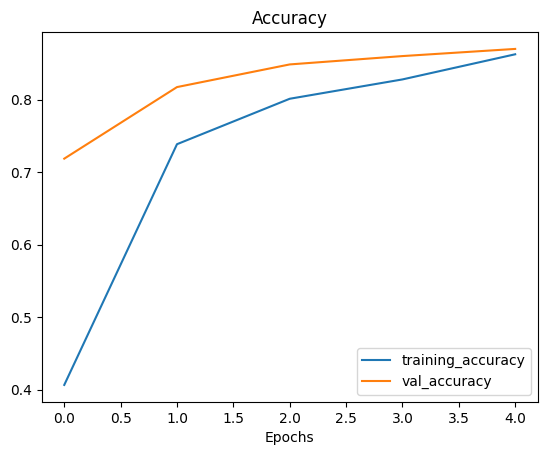

In [17]:
# Display the model's_1 training loss and accurcy curves
plot_loss_curves(history_10_percent)

## Create and Evaluate with 'model_2' - Transfer Learning Feature Extraction model, using the Keras Functional API + Data Augmentation

Let's establish the training and testing dataloaders as 'PrefetchDataset' to enhance the loading speed:

Note: The dataloaders for 'model_2' and 'model_3' are identical to those created during the 'Preprocess step', hence this step can be omitted.

In [20]:
# Create training and test directories
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [21]:
import tensorflow as tf

# Create training data input (dataloader)
IMG_SIZE = (224, 224)

# Create training data input (dataloader)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Create testing data input (dataloader)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

# Set the shape for the input layer for 'model_2'
input_shape = (224, 224, 3)

# Create a 'EfficientNetV2B0' base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
# Freeze all the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
base_model.trainable = False

# Create an input layer for 'model_2'
inputs = layers.Input(shape=input_shape, name="input_layer")
# Data augmentation
x = data_augmentation(inputs)
# Pass the augmented data to the base_model while keeping it in inference mode, so the batchnorm layers won't get updated by setting the 'training' to 'False'
x = base_model(x, training=False)
# Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# Create the output layer
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
# Combine the inputs and the outputs into 'model_2'
model_2 = tf.keras.Model(inputs, outputs)

# Compile 'model_2'
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

Given that the upcoming model experiments will utilize 'model_2', let's develop a function called 'create_base_model()' from the code above, ensuring it can be conveniently reused:

In [24]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    The function creates a model based on the 'EfficientNetV2B0' model, with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. The default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. The default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. The default is 0.001.
    - training (bool): Whether the base model is trainable. The default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """
    # Create a 'EfficientNetV2B0' base model with tf.keras.applications
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
    # Freeze all the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
    base_model.trainable = training

    # Create an input layer for the model
    inputs = layers.Input(shape=input_shape, name="input_layer")
    # Data augmentation
    x = data_augmentation(inputs)
    # Pass the augmented data to the base_model while keeping it in inference mode, so the batchnorm layers won't get updated by setting the 'training' to 'False'
    x = base_model(x, training=False)
    # Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    # Create the output layer
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    # Combine the inputs and the outputs into 'model_2'
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of 'model_2' with the 'create_base_model()' function we have just created
model_2 = create_base_model()

Let's implement a ModelCheckpoint callback that exclusively saves the **model's weights** only, ensuring that only the **optimal (best) weights** are preserved rather than the entire model after each epoch:

In [25]:
# Define the ModelCheckpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create the ModelCheckpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [26]:
# Set the initial epochs to be 5 epochs
initial_epochs = 5

# Fit the 'model_2'
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240523-152240
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9806 - accuracy: 0.3507
Epoch 1: val_loss improved from inf to 1.48077, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 103s 4s/step - loss: 1.9806 - accuracy: 0.3507 - val_loss: 1.4808 - val_accuracy: 0.6513
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3950 - accuracy: 0.6347
Epoch 2: val_loss improved from 1.48077 to 1.04722, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 98s 4s/step - loss: 1.3950 - accuracy: 0.6347 - val_loss: 1.0472 - val_accuracy: 0.7615
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0914 - accuracy: 0.7213
Epoch 3: val_loss improved from 1.04722 to 0.84767, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [======

In [27]:
# Evaluate 'model_2' on the full test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 139s 2s/step - loss: 0.6606 - accuracy: 0.8304


[0.6605522632598877, 0.8303999900817871]

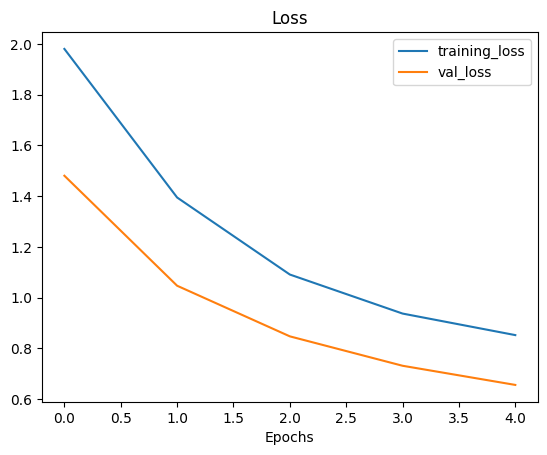

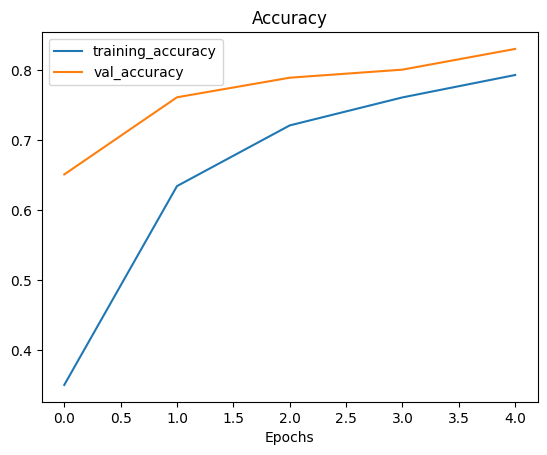

In [28]:
# Plot the model's_2 loss and accuracy curves
plot_loss_curves(history_10_percent_data_aug)

Upon examining these results, the performance of 'model_2' using 10% of the data **with data augmentation** falls short compared to 'model_1' (which uses 10% of the data **without data augmentation**). However, the trend in the curves suggests a positive direction, indicating that extended training would likely enhance its metrics.

In [29]:
# Let's load-in the saved model's_2 weights and evaluate it on the full test set
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 143s 2s/step - loss: 0.6606 - accuracy: 0.8304


In [30]:
# Checking if the results of model's_2 and the loaded model's_2 weights are the same
results_10_percent_data_aug == loaded_weights_model_results

False

In [31]:
import numpy as np

# Checking if the loaded 'model_2' results are very close to the results of model's_2
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [32]:
# Let's find out what's the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-5.96046448e-08  0.00000000e+00]


As illustrated above, this minor discrepancy arises from computational factors.

## Create and Evaluate with 'model_3' - Transfer Learning Fine-Tuning model, using the Keras Functional API

In the 'model_3' experiment, we will implement Transfer Learning by **Fine-Tuning** the 'model_2' checkpoint on **10%** of the training data with data augmentation. This process involves customizing the pre-trained model to better fit our specific data. Specifically, we will use the same base model, unfreeze some of its top layers, and train the model for additional epochs.

In [33]:
# Display the layers of the loaded model
model_2.layers

In [34]:
# Find out the layer's names and numbers as well as whether they're trainable
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7dedff322770> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7dee0c637ca0> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.src.engine.functional.Functional object at 0x7dedff3c2ef0> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7dedff48c160> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7dedff3a9d50> | Trainable? True


In [35]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [36]:
# Display the base_model of 'model_2' (reminder: the layer at index 2 is the EfficientNetV2B0 'base_model')
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [37]:
# Display how many layers are trainable in the 'model_2_base_model' ('EfficientNetV2B0')
print(len(model_2_base_model.trainable_variables)) #

0


In [38]:
# Find out which layers are trainable
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [39]:
# Make all the layers in the 'model_2_base_model' trainable
model_2_base_model.trainable = True

# Freeze all the layers except of the last 10 layers
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the entire 'model_3' (which is in fact the 'model_2' fine-tuned), because we have made an adjustment to the model ('model_2')
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Decrease the learning rate is 10x
                metrics=["accuracy"])

In [40]:
# Find out which layers are trainable now
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [41]:
print(len(model_2.trainable_variables))

12


In [42]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Fit the 'model_3' (which is in fact the 'model_2' fine-tuned on 10% of the data)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # Make sure to start from the previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240523-154329
Epoch 5/10
24/24 [==============================] - 105s 4s/step - loss: 0.7181 - accuracy: 0.8187 - val_loss: 0.5351 - val_accuracy: 0.8240
Epoch 6/10
24/24 [==============================] - 96s 4s/step - loss: 0.6061 - accuracy: 0.8253 - val_loss: 0.4886 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 88s 4s/step - loss: 0.5604 - accuracy: 0.8147 - val_loss: 0.4589 - val_accuracy: 0.8438
Epoch 8/10
24/24 [==============================] - 90s 4s/step - loss: 0.5237 - accuracy: 0.8440 - val_loss: 0.4701 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 95s 4s/step - loss: 0.5075 - accuracy: 0.8493 - val_loss: 0.4318 - val_accuracy: 0.8503
Epoch 10/10
24/24 [==============================] - 96s 4s/step - loss: 0.4777 - accuracy: 0.8653 - val_loss: 0.4435 - val_accuracy: 0.8339


In [43]:
# Evaluate the 'model_3' on the full test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 139s 2s/step - loss: 0.4507 - accuracy: 0.8464


In [46]:
import matplotlib.pyplot as plt

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    The function compares 2 model's history objects.
    """
    # Get the original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]
    print(len(acc))
    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine the original history with the new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]
    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]
    print(len(total_acc))
    print(total_acc)

    # First plot for training and validation accuray
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Second plot training and validation loss
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.35066667199134827, 0.6346666812896729, 0.7213333249092102, 0.7613333463668823, 0.7933333516120911, 0.8186666369438171, 0.8253333568572998, 0.8146666884422302, 0.843999981880188, 0.8493333458900452, 0.8653333187103271]


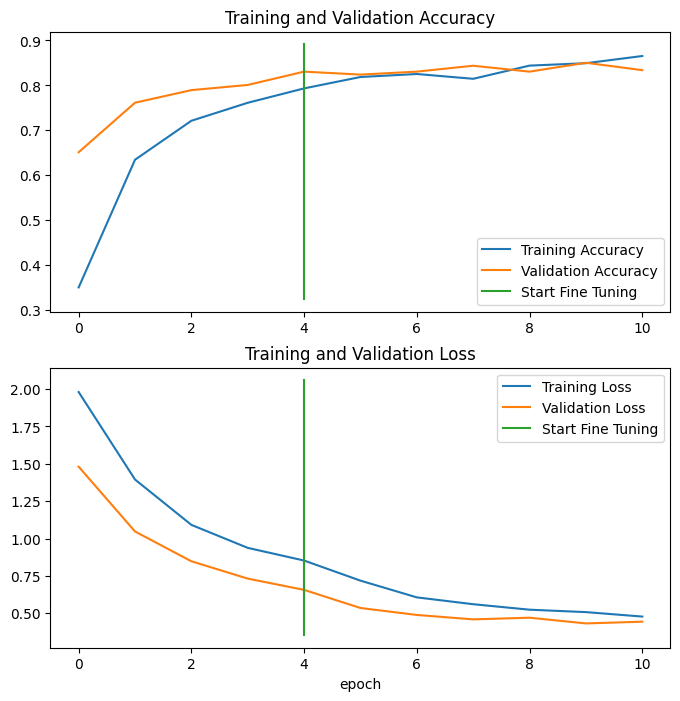

In [47]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

As demonstrated above, the trends are progressing favorably. Nevertheless, fine-tuning tends to yield optimal results with larger datasets. For the subsequent experiment, 'model_4', we will fine-tune the 'model_2' checkpoint using **100%** of the data.

##'model_4' - Transfer Learning Fine-Tuning model, using the Keras Functional API - 10 Classes 100% data



### Get the data

In [48]:
# Download the publicly shared '10_food_classes_all_data' dataset (which contains 100% of the data) from my Google Drive account
!gdown --id 1iHhwH70OMenmIJQqmV7zfx2xcnEKARyZ

# Unzip the dataset by using the 'unzip_data()' we have imported earlier from the 'helper_functions.py' script
unzip_data("10_food_classes_all_data.zip")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1iHhwH70OMenmIJQqmV7zfx2xcnEKARyZ
From (redirected): https://drive.google.com/uc?id=1iHhwH70OMenmIJQqmV7zfx2xcnEKARyZ&confirm=t&uuid=b953e3b2-9dd9-4e4c-a8c7-9528cc5655a5
To: /content/food-image-deca-classifier-computer-vision/10_food_classes_all_data.zip
100% 519M/519M [00:08<00:00, 59.5MB/s]


### Inspect the data

In [49]:
# Setting up the new data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [50]:
# Finding out how many images there are in the new dataset
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

### Preprocess the data

Let's create train and test dataloaders as 'PrefetchDataset' datatype for a faster loading process:

Please note that the test dataloader employs the same dataset utilized in the previous models, thus its inclusion is not essential.

In [51]:
import tensorflow as tf

# Define the target size of the images to load in
IMG_SIZE = (224, 224)

# Create training data input (dataloader)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Create testing data input (dataloader)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Create and Evaluate with 'model_4'

Currently, 'model_2' has undergone fine-tuning using **10%** of the data. To proceed with fine-tuning on **100%** of the data while maintaining experimental consistency, it is crucial to first revert 'model_2's weights to the checkpoint saved after 5 epochs of feature extraction.

Therefore, we will begin by evaluating the existing 'model_3' (which is the fine-tuned version of 'model_2' using 10% of the data) on the full test set:

In [52]:
model_2.evaluate(test_data)

79/79 [==============================] - 155s 2s/step - loss: 0.4507 - accuracy: 0.8464


[0.45067310333251953, 0.8464000225067139]

In [53]:
results_fine_tune_10_percent

[0.45067298412323, 0.8464000225067139]

In [54]:
# Create a new instance of 'model_2' for 'model_4'
model_2 = create_base_model(learning_rate=0.0001) # Decreasing the learning rate by 10x for fine-tuning

Let's load-in the previously checkpointed weights (**model's_2** checkpointed weights) in order to make sure 'model_4' starts at the same checkpoint:

In [55]:
# Let's load-in the previously checkpointed weights (model's 2 checkpointed weights)
model_2.load_weights(checkpoint_path)

In [56]:
# Display the summary of 'model_2' (find out how many trainable variables there are)
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [57]:
print(len(model_2.trainable_variables))

2


In [58]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 143s 2s/step - loss: 0.6606 - accuracy: 0.8304


[0.6605522632598877, 0.8303999900817871]

In [59]:
# Find out which layers are tuneable in the entire 'model_2' model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [60]:
# Unfreezing the top 10 layers in the model_2's base_model ('efficientnetv2-b0')
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freezing all the layers except of the last 10 layers to make them trainable for fine-tuning
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [61]:
# Find out which layers are tuneable in the 'efficientnetv2-b0' base model (which actually is a layer in the 'model_2')
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [62]:
# Recompile the model, because we have made adjustments to the 'model_2'
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Decreasing the learning rate by 10x
                metrics=["accuracy"])

In [63]:
# Define the number of epochs for fine-tuning 'model_2'
fine_tune_epochs = initial_epochs + 5

# Fit the 'model_4' (which is in fact the 'model_2' fine-tuned on 100% of the data)
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1], # Make sure to start from the previous last epoch
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20240523-160445
Epoch 5/10
235/235 [==============================] - 629s 3s/step - loss: 0.7217 - accuracy: 0.7664 - val_loss: 0.3726 - val_accuracy: 0.8701
Epoch 6/10
235/235 [==============================] - 584s 2s/step - loss: 0.5962 - accuracy: 0.8089 - val_loss: 0.3016 - val_accuracy: 0.8865
Epoch 7/10
235/235 [==============================] - 577s 2s/step - loss: 0.5399 - accuracy: 0.8217 - val_loss: 0.2859 - val_accuracy: 0.9046
Epoch 8/10
235/235 [==============================] - 567s 2s/step - loss: 0.5073 - accuracy: 0.8375 - val_loss: 0.2646 - val_accuracy: 0.9161
Epoch 9/10
235/235 [==============================] - 585s 2s/step - loss: 0.4673 - accuracy: 0.8487 - val_loss: 0.2534 - val_accuracy: 0.9145
Epoch 10/10
235/235 [==============================] - 562s 2s/step - loss: 0.4474 - accuracy: 0.8545 - val_loss: 0.2669 - val_accuracy: 0.9128


In [64]:
# Evaluate the 'model_4' on the full test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 172s 2s/step - loss: 0.2975 - accuracy: 0.9012


[0.2975057065486908, 0.901199996471405]

In [65]:
results_fine_tune_10_percent

[0.45067298412323, 0.8464000225067139]

5
11
[0.35066667199134827, 0.6346666812896729, 0.7213333249092102, 0.7613333463668823, 0.7933333516120911, 0.7663999795913696, 0.8089333176612854, 0.8217333555221558, 0.8374666571617126, 0.8486666679382324, 0.854533314704895]


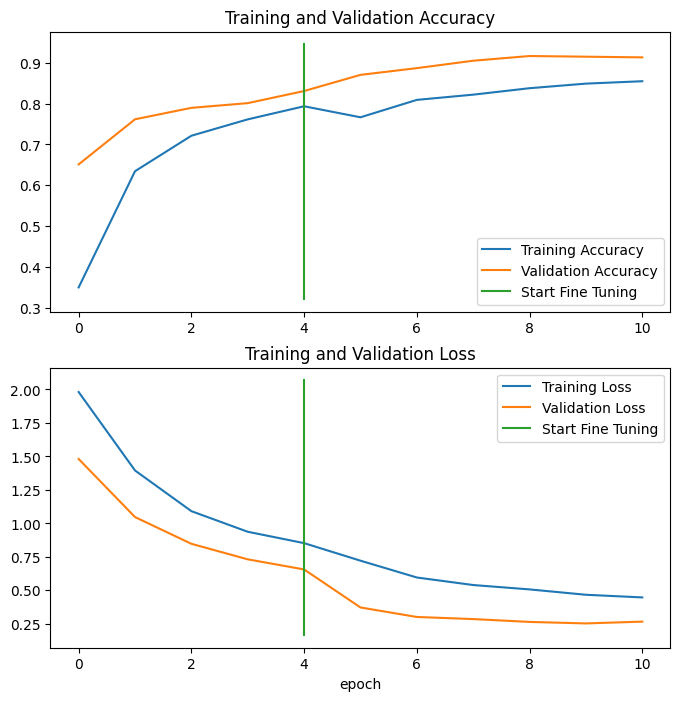

In [66]:
# Compare the results
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

## Visualizing the experimental data using TensorBoard

All the results from our modeling experiments can now be accessed on TensorBoard by uploading them to TensorBoard.dev. This is facilitated by the 'create_tensorflow_callback()' TensorBoard callback, which we imported from the 'helper_function.py' script at the start of the notebook and used for tracking all the experiments.

Below are the necessary commands for uploading and viewing the results on TensorBoard:

In [ ]:
# Upload the TensorBoard dev records
# !tensorboard dev upload --logdir ./transfer_learning \
#   --name "Transfer learning experiments" \
#   --description "Different Transfer Learning modeling experiments with varying amounts of data" \
#   --one_shot # exits the uploader once the upload is done

In [ ]:
# View the previous experiments
# !tensorboard dev list

In [ ]:
# Delete the previous experiments
# !tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q

## Conclusion

This notebook and project showcase a robust deep learning computer vision model for food image classification (10 classes) using transfer learning and fine-tuning techniques. By leveraging the power of transfer learning, we utilized pre-trained models and fine-tuned them to achieve an impressive **90%** accuracy on the full test set.

**Key Takeaways:**
- **Transfer Learning Feature Extraction:** By using pre-trained models, we significantly reduced the training time and improved the model's performance, demonstrating the efficiency of transfer learning in computer vision tasks.
- **Transfer Learning Fine-Tuning:** Fine-tuning the model further enhanced its accuracy, allowing it to adapt more effectively to the specific characteristics of our food image dataset.
- **Data Augmentation:** Applying data augmentation techniques helped in increasing the model's generalization ability, making it more robust to variations in the input images.

This project underscores the potential of transfer learning and computer vision techniques in building high-performing image classifiers. The methodologies and insights gained from this project can be applied to a wide range of computer vision applications.